### Projekt Opgave 15-17 med Breast Cancer Datasæt: ROC Curve, L1,L2 Penalty, Effekten af Regulering

15. Tegn en ROC-kurve for den logistiske regression ved hjælp af `roc_curve` og beregn AUC-score[1].

16. Træn tre `LogisticRegression`-modeller:
   - 1 uden regulering (`penalty=None`)
   - 1 med L1 penalty
   - 1 med L2 penalty

17. Analyser effekten af regulering på vægtene i modellen. Visualiser dette ved hjælp af `plot()`. Eksperimenter med forskellige værdier af `solver` og `max_iter` i din `LogisticRegression`-model.


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing


In [168]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])
df['target'] = breast_cancer['target']
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [169]:
scalar = preprocessing.StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

scalar = preprocessing.StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

X_test_scaled = scalar.transform(X_test)


In [170]:
no_pen_log_reg = LogisticRegression( penalty=None,random_state=42)
l1_log_reg = LogisticRegression( penalty='l1',random_state=42, solver='liblinear')
l2_log_reg = LogisticRegression(penalty="l2", max_iter=10000)

In [171]:
no_pen_log_reg.fit(X_train_scaled, y_train)
l1_log_reg.fit(X_train_scaled, y_train)
l2_log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [172]:
y_pred_none = no_pen_log_reg.predict(X_test_scaled)
y_pred_l1 = l1_log_reg.predict(X_test_scaled)
y_pred_l2 = l2_log_reg.predict(X_test_scaled)

pred_df = pd.DataFrame({
    'Pred None': y_pred_none,
    'Pred L1': y_pred_l1,
    'Pred L2': y_pred_l2,
    'Actual': y_test
})

pred_df.sample(frac=1)

,Pred None,Pred L1,Pred L2,Actual
369,0,0,0,0
281,0,1,1,1
83,0,0,0,0
526,1,1,1,1
77,0,0,0,0
...,...,...,...,...
158,1,1,1,1
118,0,0,0,0
564,0,0,0,0
73,1,1,1,0


### Metrics

In [173]:
from sklearn.metrics import classification_report, accuracy_score

pd.DataFrame(classification_report(y_test, y_pred_none, output_dict=True))

print(f"Penalty None: {accuracy_score(y_test, y_pred_none)}")
print(f"Penalty L1: {accuracy_score(y_test, y_pred_l1)}")
print(f"Penalty L2: {accuracy_score(y_test, y_pred_l2)}")



Penalty None: 0.9385964912280702
Penalty L1: 0.9736842105263158
Penalty L2: 0.9736842105263158


### Graf

0.9461185718964953


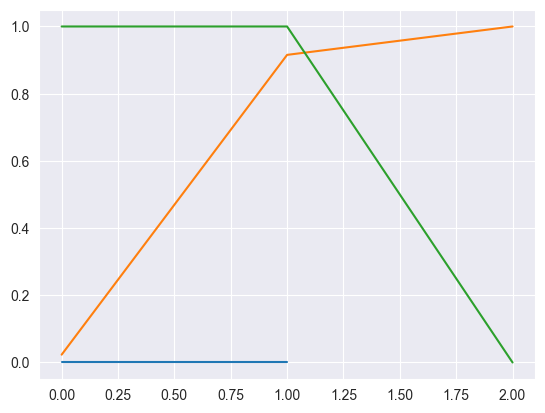

In [174]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.plot(roc_curve(y_test, y_pred_none))
print(roc_auc_score(y_test, y_pred_none))

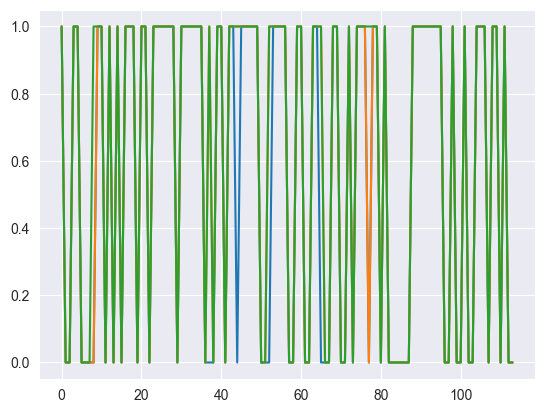

In [177]:
plt.plot(y_pred_none)
plt.plot(y_pred_l1)
plt.plot(y_pred_l2)
plt.show()